# Final Project Question 1 and 2

Benjamin Kanouse

CIS512

## Import the needed packages

In [1]:
import pandas as pd 
import numpy as np
from pandas import DataFrame,Series
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import cpi
pd.options.display.max_rows = 9999
pd.options.display.max_columns = 100

/anaconda3/lib/python3.7/site-packages/cpi/__init__.py:46: StaleDataWarning: CPI data is out of date. To accurately inflate to today's dollars, you must run `cpi.update()`.
  warnings.warn(StaleDataWarning())


## Load data into DataFrames

In [2]:
train_data = DataFrame(pd.read_csv('train.csv'))
test_data = DataFrame(pd.read_csv('test.csv'))

## Examine the data
The data set has x records with y attributes.

In [3]:
train_shape = train_data.shape
test_shape = test_data.shape

print(f'The shape of the train data is {train_shape}, and the shape of the test data is {test_shape}.')

The shape of the train data is (1460, 81), and the shape of the test data is (1459, 80).


In [4]:
train_columns = train_data.columns
test_columns = test_data.columns
if len(train_columns) > len(test_columns):
  print(f'The training data has {len(train_columns)-len(test_columns)} more columns than the test data.')

The training data has 1 more columns than the test data.


In [5]:
diff_columns = set(train_data.columns).symmetric_difference(set(test_data.columns))

if len(diff_columns) > 0:
  print(f'The extra column in the train data is {diff_columns}')

The extra column in the train data is {'SalePrice'}


In [6]:
print(train_data.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [7]:
train_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [8]:
percentage_null = np.sum(train_data.isnull()) / len(train_data.index) > 0.7
bad_columns = list(percentage_null.index[percentage_null])

print(f'Columns with more than 70% null data in the train data: {bad_columns}')

Columns with more than 70% null data in the train data: ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [9]:
percentage_null = np.sum(test_data.isnull()) / len(test_data.index) > 0.7
bad_columns = list(percentage_null.index[percentage_null])

print(f'Columns with more than 70% null data in the train data: {bad_columns}')

Columns with more than 70% null data in the train data: ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [10]:
train_data.drop(bad_columns,axis=1,inplace=True)
test_data.drop(bad_columns,axis=1,inplace=True)

In [11]:
np.sum(train_data.isnull()).where(np.sum(train_data.isnull()) > 0).dropna() * 100 / 1460

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [12]:
np.sum(train_data.isnull()).where(np.sum(train_data.isnull()) > 0).dropna().index.tolist()

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [13]:
# LotFrontage dont knwo what to do with this
# MasVnrType this one is probably none?
# MasVnrArea same records as above, should probably be set to 0.
# BsmtQual should probably be NA for no basement. Many of these records have a 'slab' foundation.
# BsmtCond should probably be NA for no basement. Many of these records have a 'slab' foundation.
# BsmtExposure should probably be NA for no basement. Many of these records have a 'slab' foundation.
# BsmtFinType1 should probably be NA for no basement. Many of these records have a 'slab' foundation.
# BsmtFinType2 should probably be NA for no basement. Many of these records have a 'slab' foundation.
# Electrical only one record, seems like an odd one...
# FireplaceQu should probably be NA. Most of them have Fireplaces==0
# GarageType should probably be NA. since the GarageArea is 0
# GarageYrBlt not sure what to do with this. there is no default, and these houses probably don't have garages. We might want to find the average one?
# GarageFinish should probably be NA. since the GarageArea is 0
# GarageQual should probably be NA. since the GarageArea is 0
# GarageCond should probably be NA. since the GarageArea is 0

train_data[train_data['Electrical'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1379  1380          80       RL         73.0     9735   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1379         Lvl    AllPub    Inside       Gtl       Timber       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1379       Norm     1Fam       SLvl            5            5       2006   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1379          2007     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1379         0.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1379           No          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1379        384          384    GasA        Gd          Y        NaN   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1379       754       640             0       1394             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1379         2         1             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1379             7        Typ           0         NaN    BuiltIn       2007.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1379          Fin           2         400         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1379         100            0              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
1379         0        0       5    2008       WD        Normal     167500

In [14]:
train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean(), inplace = True)
train_data['MasVnrType'].fillna('None', inplace = True)
train_data['MasVnrArea'].fillna(0.0, inplace = True)
train_data['BsmtQual'].fillna('NA', inplace = True)
train_data['BsmtCond'].fillna('NA', inplace = True)
train_data['BsmtExposure'].fillna('NA', inplace = True)
train_data['BsmtFinType1'].fillna('NA', inplace = True)
train_data['BsmtFinType2'].fillna('NA', inplace = True)
train_data['Electrical'].fillna(train_data['Electrical'].dropna().value_counts().idxmax(), inplace = True)
train_data['FireplaceQu'].fillna('NA', inplace = True)
train_data['GarageType'].fillna('NA', inplace = True)
train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mean(), inplace = True)
train_data['GarageFinish'].fillna('NA', inplace = True)
train_data['GarageQual'].fillna('NA', inplace = True)
train_data['GarageCond'].fillna('NA', inplace = True)


In [15]:
np.sum(train_data.isnull()).where(np.sum(train_data.isnull()) > 0).dropna().index.tolist()

[]

In [16]:
cpi.inflate(100, 1950)
1017.0954356846472

1017.0954356846472

In [17]:
train_data['SalePriceAdjustedForInflation'] = train_data.apply(lambda row: cpi.inflate(row.SalePrice, row.YrSold), axis=1)

In [18]:
train_data.to_csv('cleaned_train.csv')

Intro to the data set at the start

Percentage of missing values slide 16 and 17. (All values)

Index 190 to 200

how man house are 60k and how many are 80k




In [19]:
train_data.loc[190:200, ['SalePrice']]

SalePrice
190     315000
191     184000
192     192000
193     130000
194     127000
195     148500
196     311872
197     235000
198     104000
199     274900
200     140000

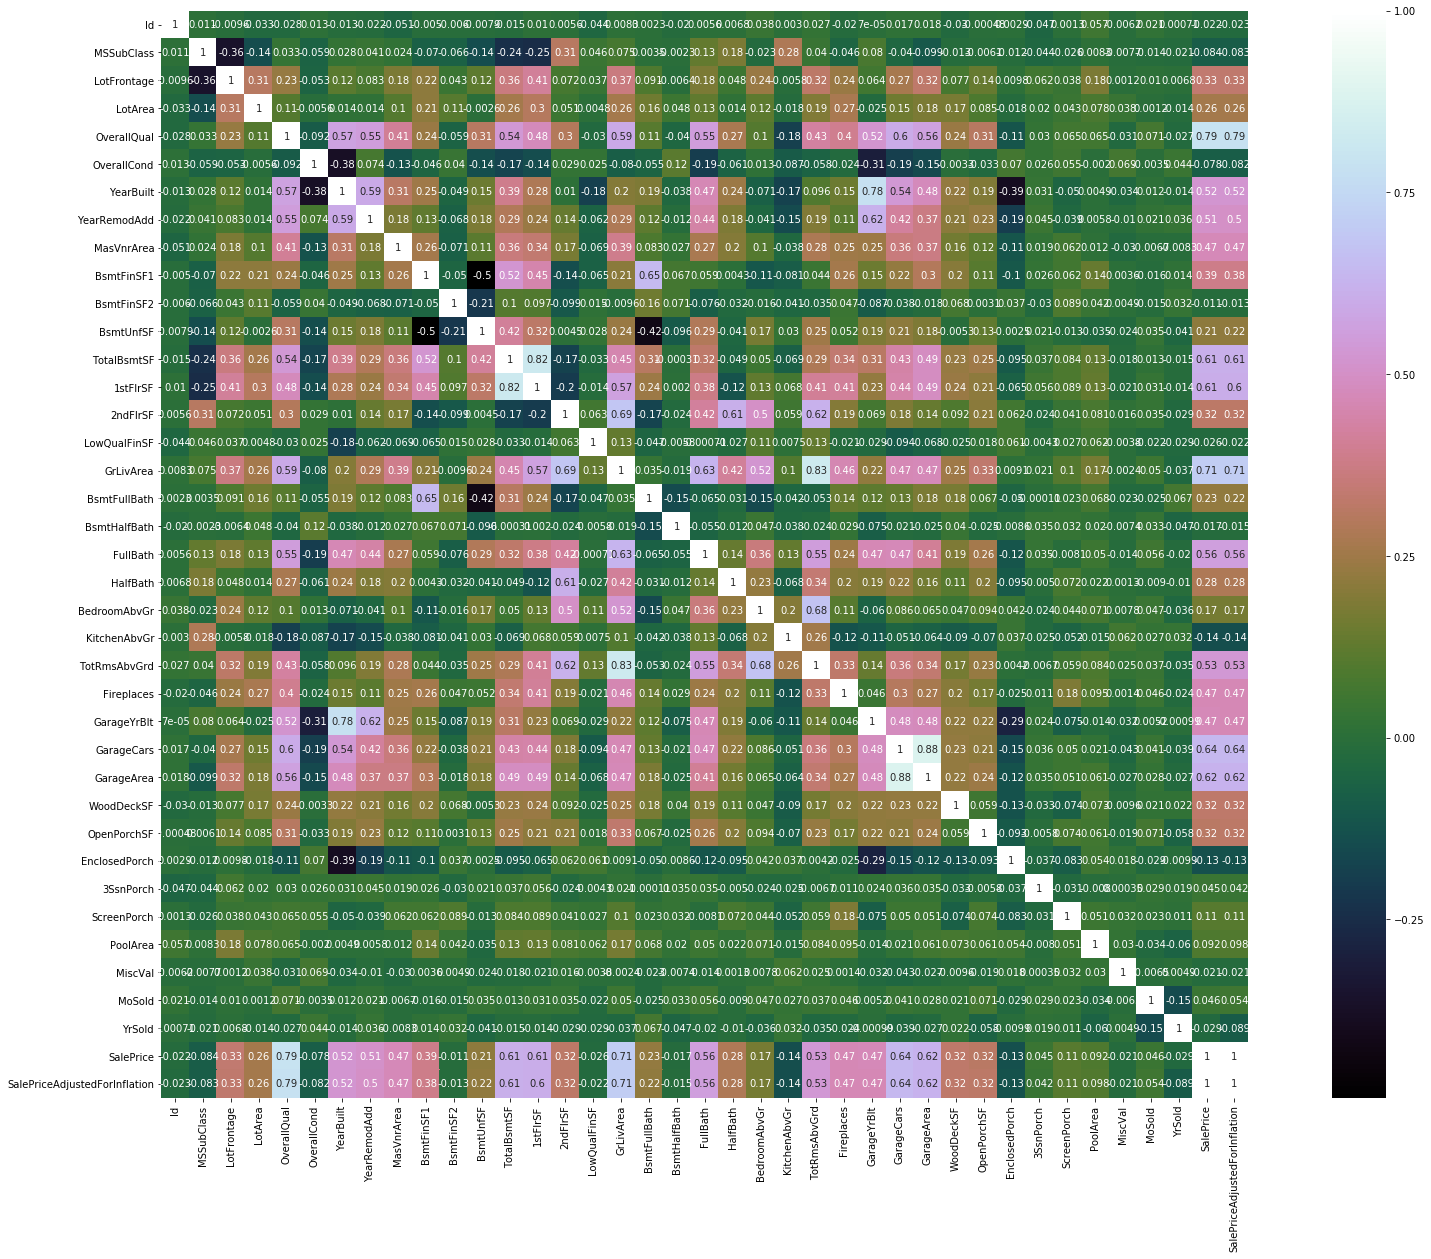

In [20]:
corr_mat = train_data.corr(method='pearson')
plt.figure(figsize=(30,20))
sns.heatmap(corr_mat, vmax=1, square=True, annot=True, cmap='cubehelix')

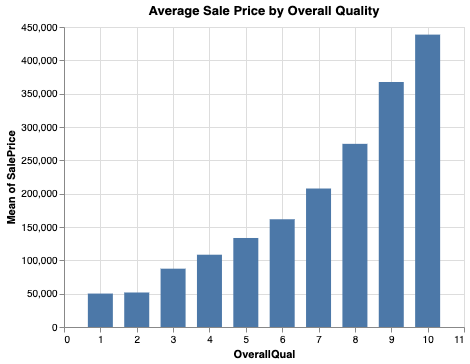

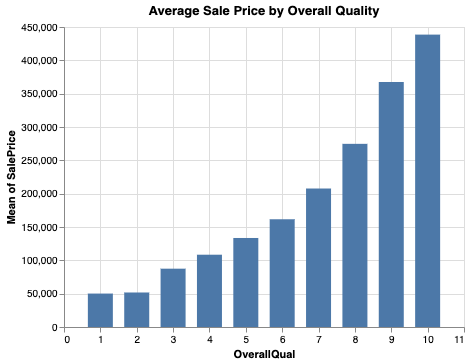

In [30]:
import altair as alt
alt.renderers.enable('notebook')

alt.Chart(train_data).mark_bar(size=25).encode(
    alt.X("OverallQual"),
    y='mean(SalePrice)',
).properties(
  title='Average Sale Price by Overall Quality'
)

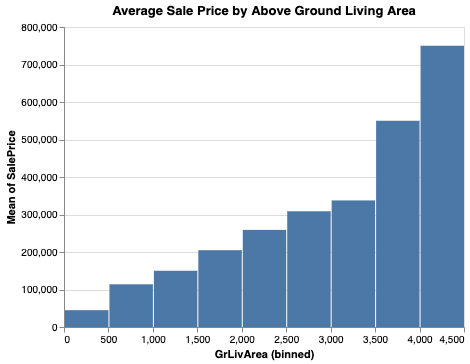

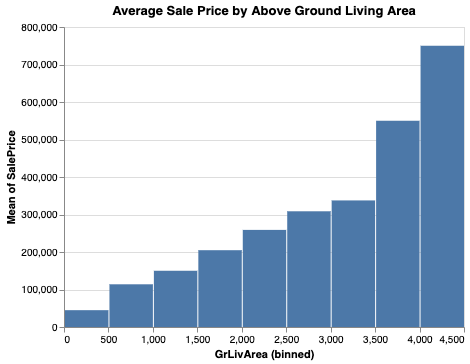

In [42]:
alt.Chart(train_data[train_data["GrLivArea"] < 4500]).mark_bar(size=1).encode(
    alt.X("GrLivArea", bin=True),
    y="mean(SalePrice)",
).properties(
  title='Average Sale Price by Above Ground Living Area'
)

In [39]:
train_data[train_data["GrLivArea"] < 5000]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1298  1299          60       RL        313.0    63887   Pave      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1298       796.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1298           Gd          GLQ        5644          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1298        466         6110    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1298      4692       950             0       5642             2             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1298         2         1             3             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1298            12        Typ           3          Gd     Attchd       2008.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1298          Fin           2        1418         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1298         214          292              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  \
1298       480        0       1    2008      New       Partial     160000   

      SalePriceAdjustedForInflation  
1298                  186607.339424